In [21]:
import numpy as np
from scipy.optimize import minimize_scalar
from scipy.optimize import fsolve
import math
import matplotlib.pyplot as plt
from matplotlib import rc, rcParams, style
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)
from matplotlib.ticker import FormatStrFormatter
import astropy.io.fits as pyfits
from astropy.wcs import WCS
from astropy import units as u
import pyregion
import aplpy
from sys import argv
import time
import os
import copy
import warnings

In [22]:
#---------------------------------------
# Input some parameters from parameter.ipynb
#---------------------------------------
%run parameter.ipynb

#---------------------------------------
# Input parameters used in this program:

###-----------
# Path name
# path_image, path_BT, path_figure

###-----------
# File name
# outname_b4,  outname_b7
# BT_B4, BT_B7

###-----------
# criteria and rms for the imaging
# I_clip_b4, I_clip_b7

10.0
1.38e+11
5.55555558269e-05 2.77777768219e-05 8.07838836272e-07
0.099999996559
0.0050000000000004
9.9999996558976
10.0
3001
52.2936458333 31.2254166667
2020-03-27T12:13:00.832346


In [23]:
# def solv_tau_B4(x):
#     freq_B4 = 145.
#     freq_B7 = 345.
#     beta = 2.
#     const_B4_B7 = (freq_B7/freq_B4)**beta
#     return BT_ratio*np.exp(-x * const_B4_B7) - np.exp(-x) - (BT_ratio - 1) 

def tau_B4_2_ratio(tau_B4):
    freq_B4 = 145.
    freq_B7 = 345.
    beta = 2.
    T_dust = 20.
    tau_B7 = tau_B4*(freq_B7/freq_B4)**beta
    T_B_B4 = T_dust * (1-np.exp(-1*tau_B4))
    T_B_B7 = T_dust * (1-np.exp(-1*tau_B7))
    return T_B_B4/T_B_B7

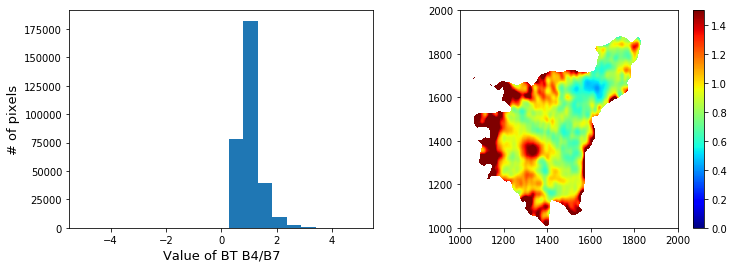

#----------------------------------------
('Done! Time spending = ', 2.1051549911499023, 'seconds.')


In [29]:
########################################################
# Main code
########################################################
if __name__ == "__main__":
    # Star measure time
    start_time = time.time()
    #---------------------------------------
        
    band_1 = BT_B4
    band_2 = BT_B7
    band_1_name = 'B4'
    band_2_name = 'B7'
    
    BT_b1_data = pyfits.getdata(band_1)
    BT_b1_hd = pyfits.getheader(band_1)
    BT_b2_data = pyfits.getdata(band_2)
    BT_b2_hd = pyfits.getheader(band_2) 
    
    BT_b1_div_BT_b2 = np.divide(BT_b1_data, BT_b2_data)
    pyfits.writeto('%sBT_%s_div_BT_%s.fits'%(path_BT, band_1_name, band_2_name), \
                   BT_b1_div_BT_b2, BT_b1_hd, overwrite=True)
    
    BT_b1_div_BT_b2_1d = BT_b1_div_BT_b2[0][0].flatten()
    
    #---------------------------------------
    # plot the figure
    fig, axs = plt.subplots(1,2,figsize=(12,4))
    
    # Plot the histogram
    axs[0].hist
    bins = np.linspace(-5,5,20)
    axs[0].hist(BT_b1_div_BT_b2_1d, bins)
    #axs[0].set_title('%s of IRAS4A1'%(fitsname_beta_12),fontsize=13)
    axs[0].set_xlabel('Value of BT %s/%s'%(band_1_name, band_2_name),fontsize=13)
    axs[0].set_ylabel('# of pixels',fontsize=13)
    #axs[0].xticks(fontsize=13)
    #axs[0].yticks(fontsize=13)
    
    # Plot the beta image
    cax = axs[1].imshow(BT_b1_div_BT_b2[0][0], vmin=0, vmax=1.5, cmap='jet')
    axs[1].set_xlim(1000,2000)
    axs[1].set_ylim(1000,2000)
    #axs[1].set_title('Spectral Index of IRAS4A1 (K band , Ka band)',fontsize=13)
    #axs[1].set_colorbar()
    cbar = fig.colorbar(cax)
    #cbar = fig.colorbar(cax, ticks=[-1, 0, 1])
    plt.show()
    
    # End measure time
    elapsed_time = time.time() - start_time
    print ('#----------------------------------------')
    print ("Done! Time spending = ", elapsed_time, "seconds.")

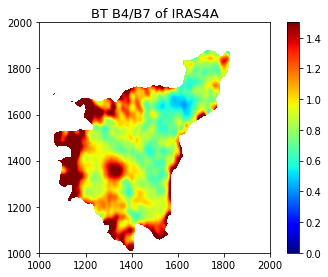

#----------------------------------------
('Done! Time spending = ', 1.3882088661193848, 'seconds.')


In [30]:
    # Star measure time
    start_time = time.time()
    #---------------------------------------
    band_1 = 'B4'
    BT_1 = BT_B4
    band_2 = 'B7'
    BT_2 = BT_B7
       
    BT_1_data = pyfits.getdata(BT_1)
    BT_1_hd = pyfits.getheader(BT_1)
    BT_2_data = pyfits.getdata(BT_2)
    BT_2_hd = pyfits.getheader(BT_2) 
    
    BT_1_div_BT_2 = np.divide(BT_1_data,BT_2_data)
#     BT_1_div_BT_2_mask_I = BT_1_div_BT_2
#     BT_1_div_BT_2_mask_I[I_]
    pyfits.writeto('%sBT_%s_div_BT_%s.fits'%(path_BT, band_1, band_2), BT_1_div_BT_2, BT_1_hd, overwrite=True)
 
    
    #---------------------------------------
    # plot the figure
    fig = plt.figure()
    ax = fig.add_axes([0.12,0.12,0.8,0.8]) # left, bottom, width, height (range 0 to 1)  
    ax.set_title('BT %s/%s of IRAS4A'%(band_1, band_2),fontsize=13)
    #axs[0].xticks(fontsize=13)
    #axs[0].yticks(fontsize=13)
    
    # Plot the beta image
    cax = ax.imshow(BT_1_div_BT_2[0][0], vmin=0, vmax=1.5, cmap='jet')
    ax.set_xlim(1000,2000)
    ax.set_ylim(1000,2000)
    #axs[1].set_title('Spectral Index of IRAS4A1 (K band , Ka band)',fontsize=13)
    #axs[1].set_colorbar()
    cbar = fig.colorbar(cax)
    #cbar = fig.colorbar(cax, ticks=[-1, 0, 1])
    plt.savefig('%sBT_%s_div_BT_%s.pdf'%(path_BT, band_1, band_2))
    plt.show()
    
    # End measure time
    elapsed_time = time.time() - start_time
    print ('#----------------------------------------')
    print ("Done! Time spending = ", elapsed_time, "seconds.")

In [7]:
# Star measure time
start_time = time.time()
#---------------------------------------
band_1 = 'B4'
BT_1 = BT_B4
band_2 = 'B7'
BT_2 = BT_B7

# BT_1_data = pyfits.getdata(BT_1)
# BT_1_hd = pyfits.getheader(BT_1)
# BT_2_data = pyfits.getdata(BT_2)
# BT_2_hd = pyfits.getheader(BT_2) 
# BT_1_div_BT_2 
# BT_b1_div_BT_b2 = np.divide(BT_b1_data, BT_b2_data)

# CASA simulation outputs have 4 dimension: (Stokes, freq, y, x)
NS, Nf, Ny, Nx = BT_1_data.shape
print NS, Nf, Ny, Nx
nx, ny = np.meshgrid(np.arange(Nx), np.arange(Ny))
print nx

tau_B4_list = []
for j in range(Ny):
    for i in range(Nx):
        BT_ratio_each = BT_1_div_BT_2[0, 0, j, i]
        
        if BT_ratio_each != np.nan:
            if BT_ratio_each >= 0.1:
                x0 = 0.1
            elif 0.1 > BT_ratio_each >= 0.02:
                x0 = 0.05
            else:
                x0 = 0.00001        
                
            def solv_tau_B4(x):
                freq_B4 = 145.
                freq_B7 = 345.
                beta = 2.
                const_B4_B7 = (freq_B7/freq_B4)**beta
                return BT_ratio_each*np.exp(-x * const_B4_B7) - np.exp(-x) - (BT_ratio_each - 1) 

            tau_B4_div = float(fsolve(solv_tau_B4, x0))
            tau_B4_list.append(tau_B4_div)
        else:
            tau_B4_list.append(np.nan)

print tau_B4_list
# End measure time
elapsed_time = time.time() - start_time
print ('#----------------------------------------')
print ("Done! Time spending = ", elapsed_time, "seconds.")

1 1 1600 1600
[[   0    1    2 ... 1597 1598 1599]
 [   0    1    2 ... 1597 1598 1599]
 [   0    1    2 ... 1597 1598 1599]
 ...
 [   0    1    2 ... 1597 1598 1599]
 [   0    1    2 ... 1597 1598 1599]
 [   0    1    2 ... 1597 1598 1599]]


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

